## Importing libraries

- **numpy** is a library for multidimensional arrays
- **pandas** library provides data structures for data manipulation and analysis
- **matplotlib** to plot graphs
- **Yahoo Finance** API used to download stock price data
- **TensorFlow** framework useful for neural networks
- **PYNYTimes** python wrapper for NY Times API
- **datetime** to work with dates
- **transformers** - Pre-trained models
- **sklearn** - Machine Learning library

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import yfinance as yf
from pynytimes import NYTAPI
import datetime
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Downloading stock price data

Using **Yahoo Finance API** to download stock price data

In [4]:
stock_data = yf.download("AAPL", "2020-10-01", "2022-09-30")
stock_data.to_csv("stock_price.csv")

stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01 00:00:00-04:00,117.639999,117.720001,115.830002,116.790001,115.205894,116120400
2020-10-02 00:00:00-04:00,112.889999,115.370003,112.220001,113.019997,111.487022,144712000
2020-10-05 00:00:00-04:00,113.910004,116.650002,113.550003,116.500000,114.919815,106243800
2020-10-06 00:00:00-04:00,115.699997,116.120003,112.250000,113.160004,111.625130,161498200
2020-10-07 00:00:00-04:00,114.620003,115.550003,114.129997,115.080002,113.519073,96849000


## Plotting the stock price data

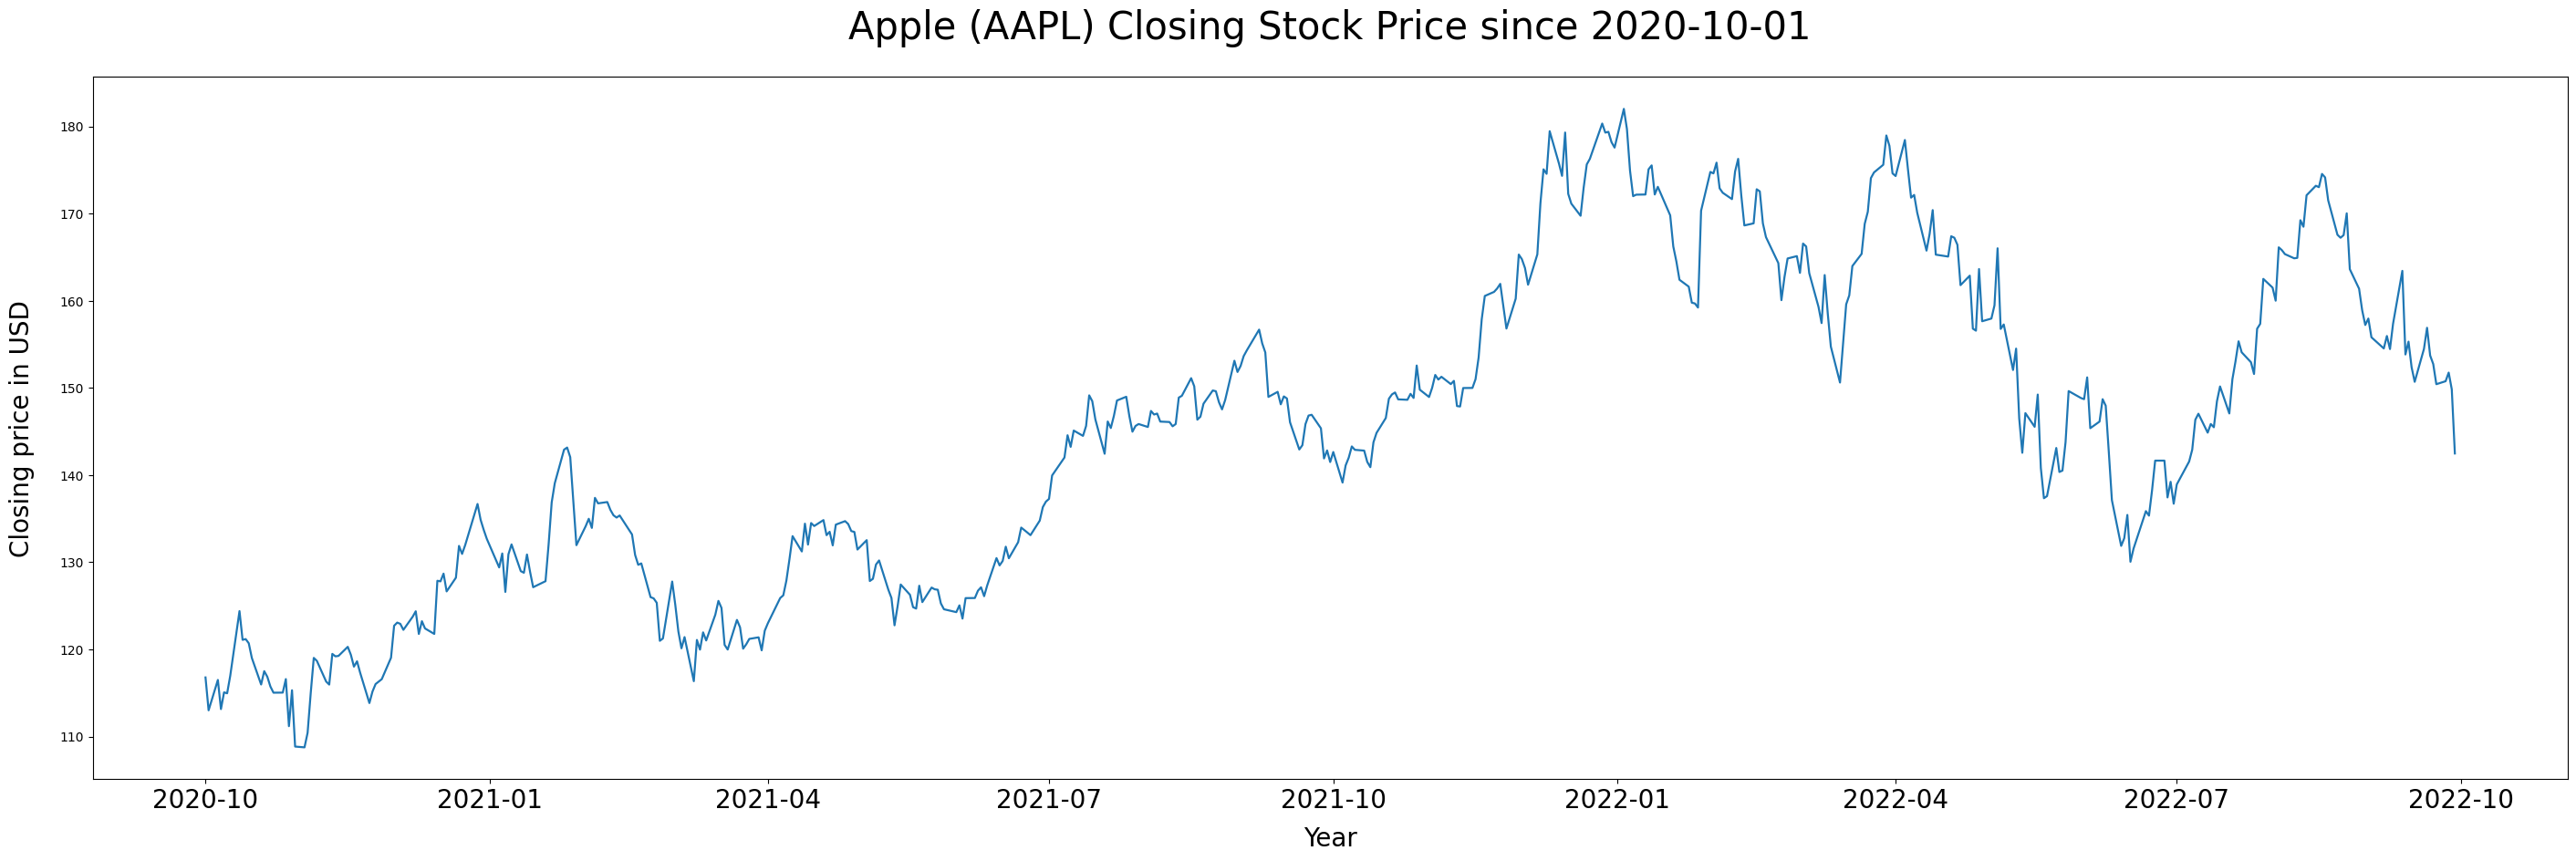

In [5]:
plt.figure(figsize=(35, 10))
plt.plot(stock_data["Close"], linewidth = 1.6)
plt.xlabel("Year", fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.ylabel("Closing price in USD", fontsize = 20, labelpad = 20)
plt.title("Apple (AAPL) Closing Stock Price since 2020-10-01", fontsize = 30, pad = 30)

plt.show()

## Downloading news data

Using PYNYTimes to download news article headlines from New York Times

In [6]:
def get_news(year, month, day):
    nyt = NYTAPI("5UI21WrJdSgZtHZpljOncwS0qMuJuOcs", parse_dates=True)
    list = []
    articles = nyt.article_search(
            results = 10,
            dates = {
                "begin": datetime.datetime(year, month, day),
                "end": datetime.datetime(year, month, day)
            },
            options = {
                "sort": "relevance",
                "news_desk": [
                    "Business", "Business Day", "Entrepreneurs", "Financial", "Technology"
                ],
                "section_name" : [
                    "Business", "Business Day", "Technology"
                ]
            }
        )
    for i in range(len(articles)):
        list.append(articles[i]['abstract'].replace(',', ""))
    return list


def generate_news_file():
    start = '2020-10-01'
    end = '2020-10-01'
    mydates = pd.date_range(start, end)
    dates = []
    for i in range(len(mydates)):
        dates.append(mydates[i].strftime("%Y-%m-%d"))
    matrix = np.zeros((len(dates) + 1, 11), dtype=object)  
    matrix[0, 0] = "Date"

    for i in range(10):
        matrix[0, i + 1] = f"News {i + 1}"
    for i in range(len(dates)):
        matrix[i + 1, 0] = dates[i]
        y, m, d = dates[i].split("-")
        news_list = get_news(int(y), int(m), int(d))
        for j in range(len(news_list)):
            matrix[i + 1, j + 1] = news_list[j]
    df = pd.DataFrame(matrix)
    df.to_csv("news.csv")


generate_news_file()

In [7]:
news_df = pd.read_csv("news.csv")
news_df.head()

,Date,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,News 9,News 10
0,2020-10-01,A standoff over further federal aid and concer...,With few people traveling and lawmakers deadlo...,After Tuesday’s debacle right-wing activists a...,BitMEX made itself a haven for hackers and ill...,Banks collected at least $13 billion in fees o...,Many of the posts on the pages include false o...,The unemployment insurance system — the main a...,House Democrats on Thursday pushed through a $...,Shares in the Swedish retailer H&M rose more t...,Pandemic programs have lowered the barriers to...
1,2020-10-02,Tesla reported record deliveries in the third ...,Payrolls grew last month but permanent layoffs...,The network is taking precautions after Lachla...,The anchor who sat about 12 feet from Presiden...,Trump administration officials claim the Chine...,Stories about Trump’s taxes the Proud Boys and...,Trump administration officials on Friday put a...,As the president clashes with the courts some ...,Overnight hundreds of tweets were posted casti...,Many people who lost their jobs in the first w...
2,2020-10-03,No patients were affected but the incident was...,Soon a wave of people will have been out of wo...,0,0,0,0,0,0,0,0
3,2020-10-04,President Trump’s coronavirus diagnosis throw...,0,0,0,0,0,0,0,0,0
4,2020-10-05,The bible of surfing and surf culture which be...,Medical experts said the president’s message d...,Cineworld the parent company of the second lar...,Mr. Pearlstine came out of retirement two year...,At least three correspondents have tested posi...,Ms. Rovner the former president of Warner Bros...,Some of President Trump’s supporters viewed hi...,The pandemic and wildfires have underscored is...,Testing alone won’t stop the spread of Covid-1...,While the drug has not been shown to effective...


## News data cleaning

Remove news articles on days we dont have stock price data of

In [9]:
news_df = pd.read_csv("news.csv")
stock_df = stock_data

for i in range(len(stock_df)):
    date = stock_df['Date'][i][:10]
    stock_df['Date'][i] = date

news_df = news_df[news_df['Date'].isin(stock_df['Date'].tolist())]

C:\Users\xshay\AppData\Local\Temp\ipykernel_8124\3579548513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Date'][i] = date


In [10]:
news_df.shape

(503, 11)

## News sentiment analysis

Compute news sentiment of each day in dataset

In [66]:
def FinBERT_sentiment_score(heading):
    tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
    finbert = AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert')
    nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)
    result = nlp(heading)
    if result[0]['label'] == "positive":
        return result[0]['score']
    elif result[0]['label'] == "neutral":
        return 0
    else:
        return (0 - result[0]['score'])

FinBERT_sentiment = []

for i in range(len(news_df)):
    news_list = news_df.iloc[i, 1:].tolist()
    news_list = [i for i in news_list if i != 0]
    score_BERT = FinBERT_sentiment_score(news_list)
    FinBERT_sentiment.append(score_BERT)

news_df['FinBERT score'] = FinBERT_sentiment

news_df.to_csv("sentiment.csv")

## Hyperparamets

Setting the hyperparamets for our model

In [68]:
split = (0.85);
sequence_length = 10;
epochs = 100
learning_rate = 0.02

## Loading data


In [79]:
stock_data = stock_df
news_data = news_df
stock_column = ['Close']
news_column = ['FinBERT score']


len_stock_data = stock_data.shape[0]

## Splitting data between train and test

Here we use 85% of the dataset as training data and remaining 15% as test data

In [80]:
train_examples = int(len_stock_data * split)
train = stock_data.get(stock_column).values[:train_examples]
train_sentiment = news_data.get(news_column).values[:train_examples]
test = stock_data.get(stock_column).values[train_examples:]
test_sentiment = news_data.get(news_column).values[train_examples:]
len_train = train.shape[0]
len_test = test.shape[0]
len_train_sentiment = train_sentiment.shape[0]
len_test_sentiment = test_sentiment.shape[0]

## Normalizing data

We normalize the data to 0 to 1 range. Reforming the data on a common scale helps our model learn pattens and thus perform better.

In [72]:
scaler = MinMaxScaler()
train, test = scaler.fit_transform(train), scaler.fit_transform(test)

## X y split

Splitting training and test data into X and y

In [73]:
X_train = []
for i in range(len_train - sequence_length):
    X_train.append(train[i : i + sequence_length])
len_X_train = len(X_train)
y_train = np.array(train[sequence_length:]).astype(float)


X_test = []
for i in range(len_test - sequence_length):
    X_test.append(test[i : i + sequence_length])
len_X_test = len(X_test)
y_test = np.array(test[sequence_length:]).astype(float)

## Adding news sentiment

Adding news sentiment data to the features of our training examples

In [74]:
for i in range(len_X_train):
    X_train[i] = X_train[i].tolist()
    X_train[i].append(train_sentiment[sequence_length + i].tolist())
X_train = np.array(X_train).astype(float)


for i in range(len_X_test):
    X_test[i] = X_test[i].tolist()
    X_test[i].append(test_sentiment[sequence_length + i].tolist())
X_test = np.array(X_test).astype(float)

## Creating model

We create an LSTM model with 5 layers

In [75]:
tf.random.set_seed(1234)
model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape = (X_train.shape[1], 1)),
        tf.keras.layers.LSTM(units = 70, activation = "tanh", return_sequences = True),
        tf.keras.layers.LSTM(units = 30, activation = "tanh", return_sequences = True),
        tf.keras.layers.LSTM(units = 10, activation = "tanh", return_sequences = False),
        tf.keras.layers.Dense(units = 1, activation = "linear")
    ]
)

model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
)

model.fit(
    X_train, y_train,
    epochs = epochs
)

Epoch 1/100
14/14 [==============================] - 6s 24ms/step - loss: 0.1170
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0264
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0518
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0152
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0055
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0047
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 9/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 10/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0047
Epoch 11/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0036
Epoch 12/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0045
Epoch 13/100
14/14 [=====

## Predictions on test set

In [76]:
y_test = scaler.inverse_transform(y_test)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1)).reshape(-1,1)

3/3 [==============================] - 1s 9ms/step


## Model evaluation

We use MSE, MAPE to evaluate our model

In [77]:
mae = mean_absolute_error(predictions, y_test)
mape = mean_absolute_percentage_error(predictions, y_test)

print(mae, mape)

178.94325580018938 0.014431660211207502


## Conclusion

Our LSTM model achieves a Mean Absolute Percentage of 0.014431660211207502

*Created by: Shayan Halder*